[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


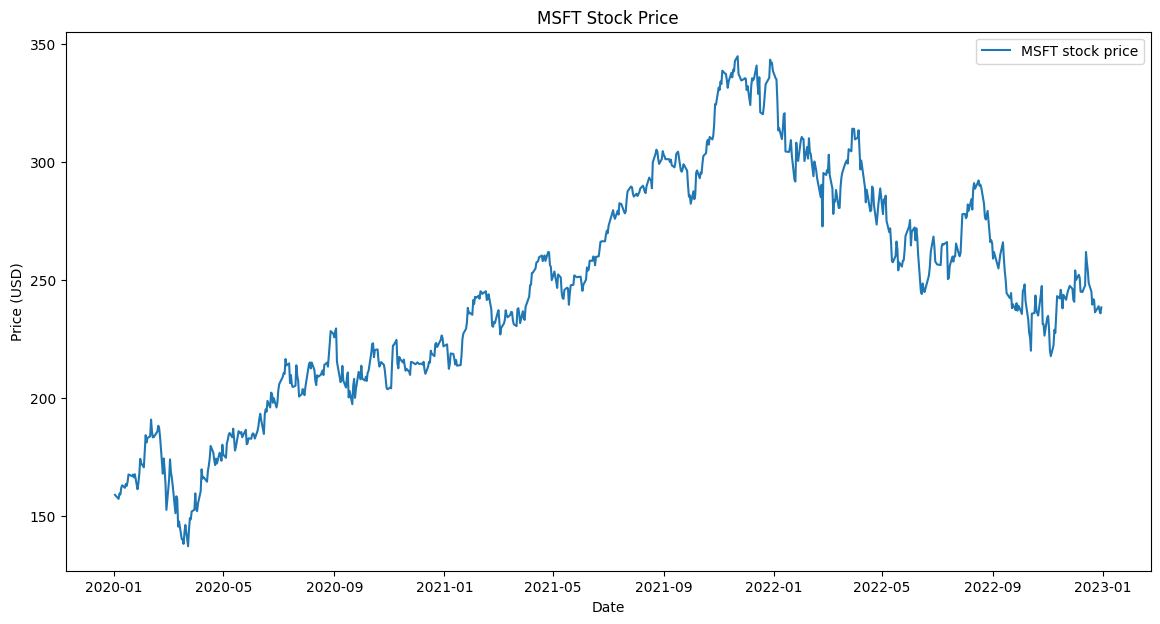

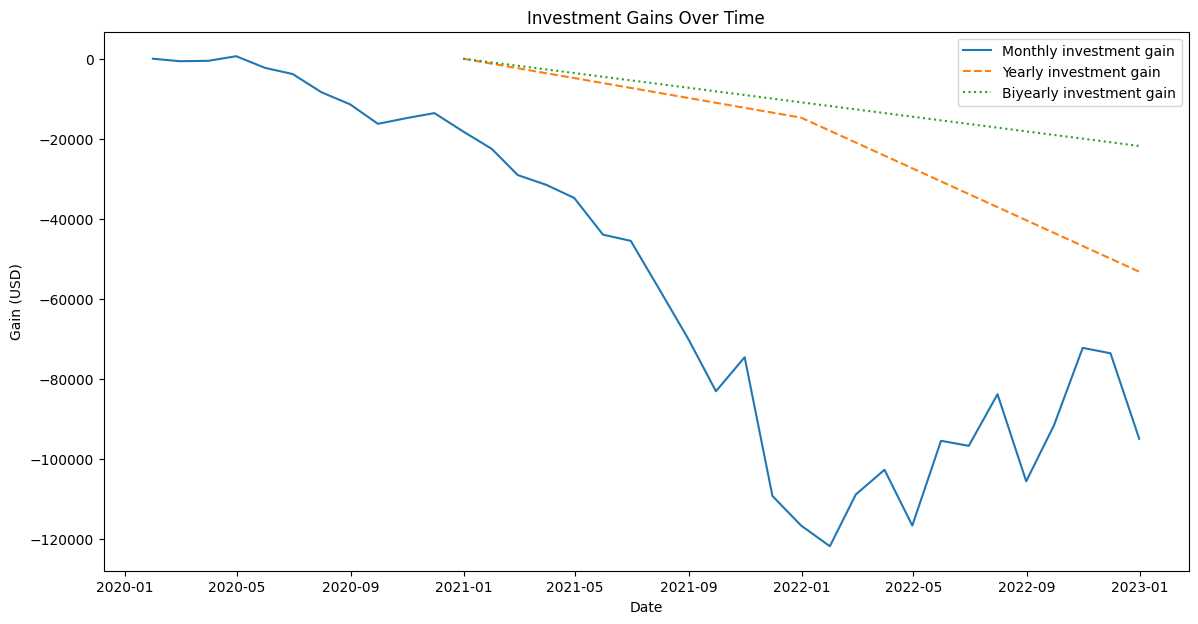

In [26]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Define the symbols and fetch data
symbol = "MSFT"
exchange_rate_symbol = "CHF=X"

start_date = "2018-01-01"
end_date = "2023-06-28"

data = yf.download(symbol, start=start_date, end=end_date)
exchange_rate_data = yf.download(exchange_rate_symbol, start=start_date, end=end_date)


# Resample the data to get the price and exchange rate at the start of each month
monthly_data = data.resample('M').first()
monthly_exchange_rate_data = exchange_rate_data.resample('M').first()

# Define broker fee function
def calculate_broker_fee(volume_in_chf):
    fee_brackets = [(5, 30), (15, 60), (25, 90), (50, 150), (100, 240), (250, 360)]
    for limit, fee in fee_brackets:
        if volume_in_chf <= limit:
            return fee
    return 480

# Calculate the amount of stock bought each month/year in USD
amount_in_chf = 500
monthly_amount_in_usd = amount_in_chf / monthly_exchange_rate_data['Open']

# Calculate monthly investment
monthly_investment = monthly_amount_in_usd / monthly_data['Open']
monthly_broker_fees = monthly_investment.apply(calculate_broker_fee)
monthly_investment['total'] = monthly_investment.cumsum() - monthly_broker_fees.cumsum()

# Calculate yearly investment
yearly_data = data.resample('Y').first()
yearly_exchange_rate_data = exchange_rate_data.resample('Y').first()

yearly_amount_in_usd = (amount_in_chf * 12) / yearly_exchange_rate_data['Open']
yearly_investment = yearly_amount_in_usd / yearly_data['Open']
yearly_broker_fees = yearly_investment.apply(calculate_broker_fee)
yearly_investment['total'] = yearly_investment.cumsum() - yearly_broker_fees.cumsum()

# Calculate every-two-years investment
biyearly_data = data.resample('2Y').first()
biyearly_exchange_rate_data = exchange_rate_data.resample('2Y').first()

biyearly_amount_in_usd = (amount_in_chf * 24) / biyearly_exchange_rate_data['Open']
biyearly_investment = biyearly_amount_in_usd / biyearly_data['Open']
biyearly_broker_fees = biyearly_investment.apply(calculate_broker_fee)
biyearly_investment['total'] = biyearly_investment.cumsum() - biyearly_broker_fees.cumsum()

# Plotting stock price
plt.figure(figsize=(14,7))
plt.plot(data['Open'], label='MSFT stock price')
plt.title('MSFT Stock Price')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

# Plotting gain over time
plt.figure(figsize=(14,7))

# Calculate and plot the gains for both investments
monthly_gains = (monthly_investment['total']*monthly_data['Open']) - (monthly_investment['total']*monthly_data['Open'].iloc[0])
plt.plot(monthly_gains, label='Monthly investment gain')

yearly_gains = (yearly_investment['total']*yearly_data['Open']) - (yearly_investment['total']*yearly_data['Open'].iloc[0])
plt.plot(yearly_gains, label='Yearly investment gain', linestyle='--')

biyearly_gains = (biyearly_investment['total']*biyearly_data['Open']) - (biyearly_investment['total']*biyearly_data['Open'].iloc[0])
plt.plot(biyearly_gains, label='Biyearly investment gain', linestyle=':')

plt.title('Investment Gains Over Time')
plt.xlabel('Date')
plt.ylabel('Gain (USD)')
plt.legend()
plt.show()
